In [122]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import itertools
from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cross_validation
from sklearn import model_selection
from sklearn import metrics
from sklearn.cross_validation import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, ShuffleSplit,  GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
%matplotlib inline

In [32]:
signup_statmdl_ds = pd.read_csv("signup_statmdl_ds.csv")
signup_statmdl_ds.shape

(54681, 23)

In [33]:
#signup_fs_ds['Unnamed: 0']
signup_statmdl_ds.drop(['Unnamed: 0'],inplace=True,axis=1)
signup_statmdl_ds.shape

(54681, 22)

In [35]:
signup_statmdl_ds.columns

Index(['driving', 'signup_veh_added_diff_cat_1', 'bgc_veh_added_diff_cat_1',
       'signup_bgc_diff_cat_1', 'signup_veh_added_diff_cat_2',
       'bgc_veh_added_diff_cat_2', 'vehicle_make_cat_Honda',
       'signup_channel_Referral', 'bgc_veh_added_diff_cat_3',
       'signup_veh_added_diff_cat_3', 'signup_bgc_diff_cat_2',
       'vehicle_model_cat_Prius', 'signup_os_mac', 'signup_os_windows',
       'city_Berton', 'signup_bgc_diff_cat_3', 'id', 'signup_channel_Organic',
       'vehicle_year_cat', 'vehicle_make_cat_missing',
       'bgc_veh_added_diff_cat_5', 'signup_os_ios_web'],
      dtype='object')

In [36]:
signup_statmdl_ds = signup_statmdl_ds[['signup_veh_added_diff_cat_1', 'bgc_veh_added_diff_cat_1',
       'signup_bgc_diff_cat_1', 'signup_veh_added_diff_cat_2',
       'bgc_veh_added_diff_cat_2', 'vehicle_make_cat_Honda',
       'signup_channel_Referral', 'bgc_veh_added_diff_cat_3',
       'signup_veh_added_diff_cat_3', 'signup_bgc_diff_cat_2',
       'vehicle_model_cat_Prius', 'signup_os_mac', 'signup_os_windows',
       'signup_bgc_diff_cat_3', 'signup_channel_Organic',
       'vehicle_year_cat', 'signup_os_ios_web','driving']]

signup_statmdl_ds.head()

,signup_veh_added_diff_cat_1,bgc_veh_added_diff_cat_1,signup_bgc_diff_cat_1,signup_veh_added_diff_cat_2,bgc_veh_added_diff_cat_2,vehicle_make_cat_Honda,signup_channel_Referral,bgc_veh_added_diff_cat_3,signup_veh_added_diff_cat_3,signup_bgc_diff_cat_2,vehicle_model_cat_Prius,signup_os_mac,signup_os_windows,signup_bgc_diff_cat_3,signup_channel_Organic,vehicle_year_cat,signup_os_ios_web,driving
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,5,0,0
3,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,4,0,1
4,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,4,0,0


In [37]:
signup_statmdl_ds.shape

(54681, 18)

In [ ]:
correlation = signup_statmdl_ds.corr()
correlation

In [120]:
# Generate a confusion matrix plot: 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


#plotting roc_curve

def plotting_roc(fpr_val,tpr_val,roc_auc_val):
    plt.figure()
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr_val, tpr_val, 'b', label = 'AUC = %0.2f' % roc_auc_val)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, np.ravel(y), cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

def logistic_regression_holdout(ind_var_train,dep_var_train,ind_var_test,dep_var_test,cv):
    # Create the hyperparameter grid
    c_space = np.logspace(-5, 8, 15)
    param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

    # Instantiate the logistic regression classifier: logreg
    logr = LogisticRegression()

    # Instantiate the GridSearchCV object: logreg_cv
    logreg_cv = GridSearchCV(logr, param_grid, cv=cv)

    # Fit it to the training data
    logreg_cv.fit(ind_var_train, dep_var_train)

    # Print the optimal parameters and best score
    print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
    print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))
    

def logistic_regression_poly(ind_var_train,dep_var_train,ind_var_test,dep_var_test,degree):
    
    # Generate the model type with make_pipeline
    
    est = make_pipeline(PolynomialFeatures(degree), LogisticRegression())
    # Fit our model to the training data
    est.fit(ind_var_train, dep_var_train)
    #est.score(X_test,y_test)
    y_pred = est.predict(ind_var_test)
    y_pred_prob = est.predict_proba(ind_var_test)
    y_pred_prob = y_pred_prob[:,1]

    accuracy = accuracy_score(dep_var_test,y_pred)
   
    recall =  recall_score(dep_var_test, y_pred,average='weighted')
    precision = precision_score(dep_var_test, y_pred,average='weighted')

    fpr, tpr, threshold = roc_curve(dep_var_test,y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plotting_roc(fpr,tpr,roc_auc)
    
    print("Accuracy :", accuracy)
    print("Recall :", recall)
    print("Precision :", precision)
    print("ROC_AUC :", roc_auc)
    print("Threshold :", threshold)
    
    return accuracy, recall, precision, est
    
#function for classifying:

def train_score(classifier,x,y,validate):
    xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(x, y, test_size=0.2, random_state=1234)
    ytrain=np.ravel(ytrain)
    
    print(xtrain.shape)
    print(xtest.shape)
    
    clf = classifier.fit(xtrain, ytrain)
    
    # accuracy for test & train:
    train_acc=clf.score(xtrain, ytrain)
    test_acc=clf.score(xtest,ytest)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    
    y_true = ytest
    y_pred = clf.predict(xtest)


    conf = confusion_matrix(y_true, y_pred)
    print(conf)

    print ('\n')
    print ("Precision:              %0.2f" %(conf[1, 1] / (conf[1, 1] + conf[0, 1])))
    print ("Recall:                 %0.2f"% (conf[1, 1] / (conf[1, 1] + conf[1, 0])))
    
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure()
    #plot_confusion_matrix1(cm)
    plot_confusion_matrix(cm, classes=[0,1])
    
    #plotting roc curve
    y_score=clf.predict_proba(xtest)[:,1]

    fpr, tpr,_ = roc_curve(ytest, y_score)
    roc_auc = auc(fpr, tpr)
    plotting_roc(fpr,tpr,roc_auc)
    
    #------------------------------------------------------
    #Determine generalization accuracy
    
    xhold_out = validate[validate.columns[:-1]]
    yhold_out = validate[validate.columns[-1:]]
    
    gen_acc=clf.score(xhold_out,yhold_out)
    print("Generalization Accuracy:     %0.2f" %(gen_acc))
    
    yhold_out_true = yhold_out
    yhold_out_pred = clf.predict(xhold_out)
    
    conf_gen = confusion_matrix(yhold_out_true, yhold_out_pred)
    print(conf_gen)

    print ('\n')
    print ("Precision:              %0.2f" %(conf_gen[1, 1] / (conf_gen[1, 1] + conf_gen[0, 1])))
    print ("Recall:                 %0.2f"% (conf_gen[1, 1] / (conf_gen[1, 1] + conf_gen[1, 0])))
    
    cm_ho=confusion_matrix(yhold_out_true, yhold_out_pred, labels=None)
    
    plt.figure()
    #plot_confusion_matrix1(cm)
    plot_confusion_matrix(cm_ho, classes=[0,1])
    
    #plotting roc curve
    yhold_out_score=clf.predict_proba(xhold_out)[:,1]

    fpr, tpr,_ = roc_curve(yhold_out, yhold_out_score)
    roc_auc = auc(fpr, tpr)
    plotting_roc(fpr,tpr,roc_auc)

    

**Split the dataset randomly into (60% - train set, 20% - hold-out set, 20% - test set)**

In [93]:
train, validate, test = np.split(signup_statmdl_ds.sample(frac=1), [int(.6*len(signup_statmdl_ds)), int(.8*len(signup_statmdl_ds))])

In [94]:
print(train.shape)
print(validate.shape)
print(test.shape)

(32808, 18)
(10936, 18)
(10937, 18)


In [12]:
#Combine train and test together to create train set on which we can use the standard cross_validation.train_test_split 
#function

#Set aside validate set

In [ ]:
#Concatenating 'test' dataset to the 'train' dataset

signup_sklrn_ds = pd.concat([train, test], axis =0)
signup_sklrn_ds.head(10)

In [96]:
signup_sklrn_ds.shape

(43745, 18)

In [97]:
#Set aside validate set
validate.to_csv("validate_less_vars.csv")

**Split the signup_sklrn_ds dataset into data and target** 

In [98]:
X = signup_sklrn_ds[signup_sklrn_ds.columns[:-1]]
X.head()

,signup_veh_added_diff_cat_1,bgc_veh_added_diff_cat_1,signup_bgc_diff_cat_1,signup_veh_added_diff_cat_2,bgc_veh_added_diff_cat_2,vehicle_make_cat_Honda,signup_channel_Referral,bgc_veh_added_diff_cat_3,signup_veh_added_diff_cat_3,signup_bgc_diff_cat_2,vehicle_model_cat_Prius,signup_os_mac,signup_os_windows,signup_bgc_diff_cat_3,signup_channel_Organic,vehicle_year_cat,signup_os_ios_web
52764,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1
10729,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,1
26366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,0
11923,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1
20554,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [100]:
y = signup_sklrn_ds[signup_sklrn_ds.columns[-1:]]
y.head()

,driving
52764,0
10729,0
26366,0
11923,0
20554,0


**Logistic Regression**

(34996, 17)
(8749, 17)
Training Data Accuracy: 0.94
Test Data Accuracy:     0.94
[[7444  274]
 [ 247  784]]


Precision:              0.74
Recall:                 0.76
Confusion matrix, without normalization
[[7444  274]
 [ 247  784]]


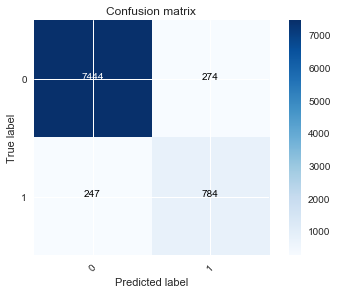

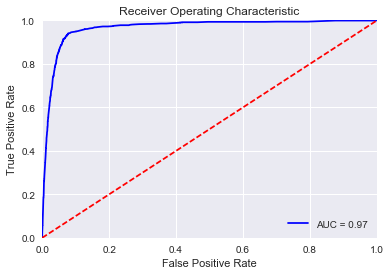

Generalization Accuracy:     0.94
[[9344  370]
 [ 290  932]]


Precision:              0.72
Recall:                 0.76
Confusion matrix, without normalization
[[9344  370]
 [ 290  932]]


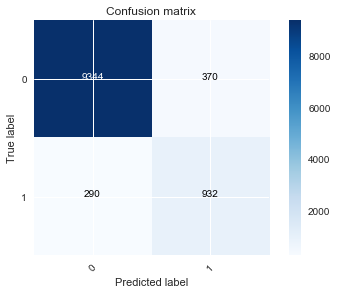

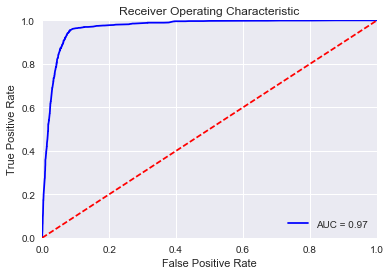

In [108]:
log_clf=LogisticRegression()
train_score(log_clf,X,y,validate)

**Statsmodel Logistic Regression**

In [49]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('driving ~ signup_veh_added_diff_cat_1 + bgc_veh_added_diff_cat_1 + signup_bgc_diff_cat_1 + signup_veh_added_diff_cat_2 + bgc_veh_added_diff_cat_2 + vehicle_make_cat_Honda + signup_channel_Referral + bgc_veh_added_diff_cat_3 + signup_veh_added_diff_cat_3 + signup_bgc_diff_cat_2 + vehicle_model_cat_Prius + signup_os_mac + signup_os_windows + signup_bgc_diff_cat_3 + signup_channel_Organic + vehicle_year_cat + signup_os_ios_web', data=signup_sklrn_ds, return_type="dataframe")
# Create your model
log_model = sm.Logit(y, X)
# Fit your model to your training set
fit = log_model.fit()
# Print summary statistics of the model's performance
fit.summary()

Optimization terminated successfully.
         Current function value: 0.133995
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                driving   No. Observations:                43745
Model:                          Logit   Df Residuals:                    43727
Method:                           MLE   Df Model:                           17
Date:                Wed, 02 Aug 2017   Pseudo R-squ.:                  0.6170
Time:                        00:05:44   Log-Likelihood:                -5861.6
converged:                       True   LL-Null:                       -15306.
                                        LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept                      -6.5745      0.164    -40.049      0.000        -6.896    -6.253
signup_veh_added_diff_cat_1     3.6233      0.168     21.581      0.000         3.294     3.952
bgc_veh_added_diff_cat_1        1.5477      0.123     12.536      0.000         1.306     1.790
signup_bgc_diff_cat_1           2.2175      0.116     19.177      0.000         1.991     2.444
signup_veh_added_diff_cat_2     3.3248      0.144     23.017      0.000         3.042     3.608
bgc_veh_added_diff_cat_2        1.2621      0.115     11.006      0.000         1.037     1.487
vehicle_make_cat_Honda          0.1500      0.075      1.995      0.046         0.003     0.297
signup_channel_Referral         0.6809      0.057     12.038      0.000         0.570     0.792
bgc_veh_added_diff_cat_3        0.8001      0.102      7.869      0.000         0.601     0.999
signup_veh_added_diff_cat_3     2.9514      0.117     25.237      0.000         2.722     3.181
signup_bgc_diff_cat_2           1.8791      0.112     16.773      0.000         1.660     2.099
vehicle_model_cat_Prius         0.6207      0.163      3.800      0.000         0.301     0.941
signup_os_mac                   0.5030      0.076      6.609      0.000         0.354     0.652
signup_os_windows               0.4104      0.076      5.402      0.000         0.261     0.559
signup_bgc_diff_cat_3           1.3163      0.109     12.099      0.000         1.103     1.530
signup_channel_Organic          0.2109      0.067      3.145      0.002         0.079     0.342
vehicle_year_cat                0.0422      0.026      1.630      0.103        -0.009     0.093
signup_os_ios_web               0.0821      0.056      1.458      0.145        -0.028     0.192
===============================================================================================
"""

**Decision Tree**

(34996, 17)
(8749, 17)
Training Data Accuracy: 0.96
Test Data Accuracy:     0.93
[[7441  277]
 [ 298  733]]


Precision:              0.73
Recall:                 0.71
Confusion matrix, without normalization
[[7441  277]
 [ 298  733]]


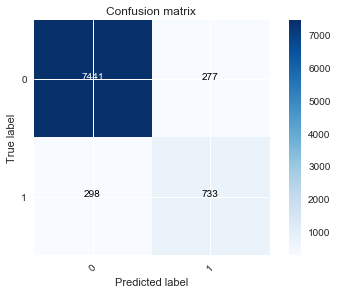

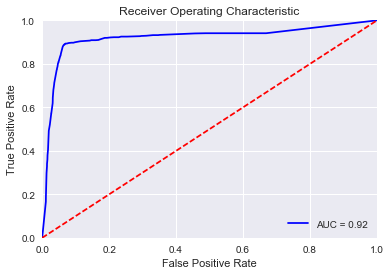

Generalization Accuracy:     0.93
[[9361  353]
 [ 385  837]]


Precision:              0.70
Recall:                 0.68
Confusion matrix, without normalization
[[9361  353]
 [ 385  837]]


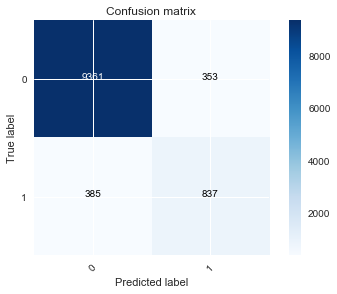

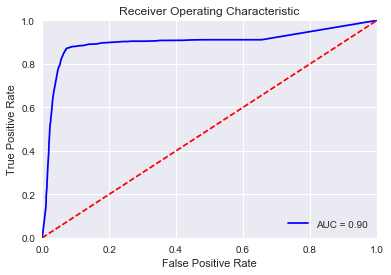

In [111]:
dt = DecisionTreeClassifier()
train_score(dt,X,y,validate)

**Gaussian Naive Bayes**

(34996, 17)
(8749, 17)
Training Data Accuracy: 0.90
Test Data Accuracy:     0.91
[[6966  752]
 [  72  959]]


Precision:              0.56
Recall:                 0.93
Confusion matrix, without normalization
[[6966  752]
 [  72  959]]


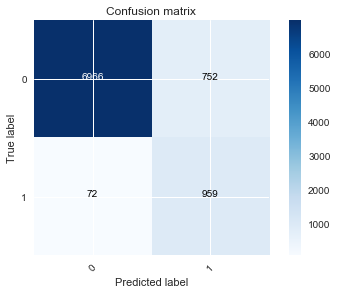

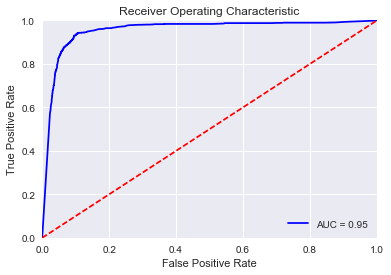

Generalization Accuracy:     0.90
[[8675 1039]
 [  66 1156]]


Precision:              0.53
Recall:                 0.95
Confusion matrix, without normalization
[[8675 1039]
 [  66 1156]]


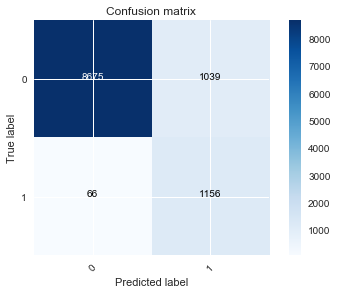

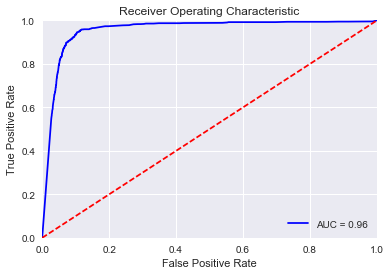

In [113]:
gnb = GaussianNB()
train_score(gnb,X,y,validate)

**Support Vector Machine**

(34996, 17)
(8749, 17)
Training Data Accuracy: 0.94
Test Data Accuracy:     0.94
[[7425  293]
 [ 209  822]]


Precision:              0.74
Recall:                 0.80
Confusion matrix, without normalization
[[7425  293]
 [ 209  822]]


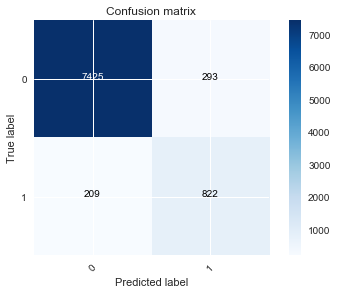

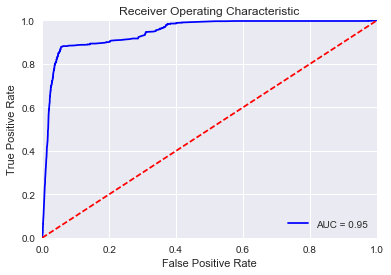

Generalization Accuracy:     0.94
[[9313  401]
 [ 256  966]]


Precision:              0.71
Recall:                 0.79
Confusion matrix, without normalization
[[9313  401]
 [ 256  966]]


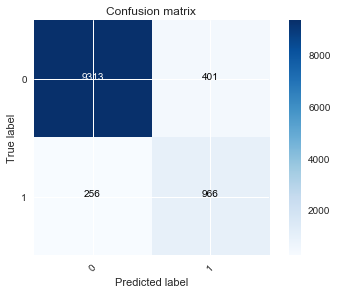

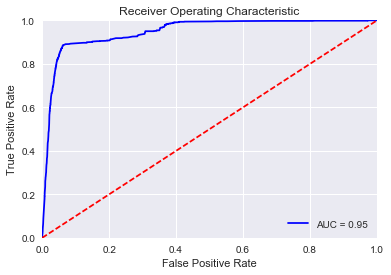

In [114]:
model_svm = svm.SVC(kernel='rbf',probability=True)
train_score(model_svm,X,y,validate)

**K Nearest Neighbors**

In [117]:
#Try it with a lot of different k values (number of neighbors), from 1 to 20, 
#and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=5678)

accuracy = []
accuracy_index = []

for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(np.ravel(y_test),np.ravel(y_pred)))
    accuracy_index.append(k)
    
print(accuracy)
print(accuracy_index)
max_accuracy = max(accuracy)
print("Max accuracy:", max_accuracy)
max_acc_k = accuracy.index(max_accuracy)+1  
print("Max K:", max_acc_k)

/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[0.91050405760658359, 0.91747628300377182, 0.9289061607040805, 0.92364841696193856, 0.93347811178420392, 0.9313064350211453, 0.93576408732426564, 0.93507829466224712, 0.93839295919533661, 0.93839295919533661, 0.93805006286432735, 0.93724997142530575, 0.93942164818836438, 0.93827866041833352, 0.93976454451937363, 0.94045033718139215, 0.94227911761344152, 0.94136472739741683, 0.94216481883643843, 0.94182192250542918]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Max accuracy: 0.942279117613
Max K: 17


/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Confusion matrix, without normalization
[[7505  278]
 [ 282  684]]


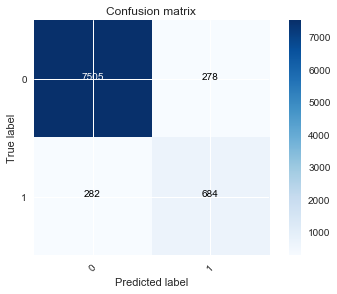

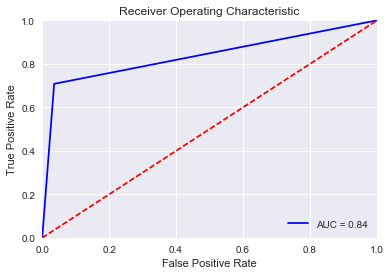

Accuracy : 0.935992684878
Recall : 0.935992684878
Precision : 0.935877121003
ROC_AUC : 0.836177829846
Threshold : [2 1 0]
Generalization Accuracy:     0.94
[[9370  344]
 [ 332  890]]


Precision:              0.72
Recall:                 0.73
Confusion matrix, without normalization
[[9370  344]
 [ 332  890]]


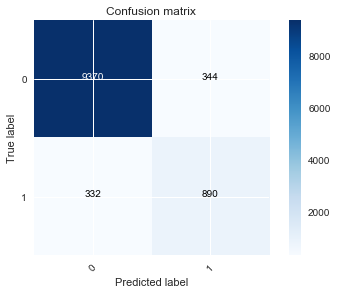

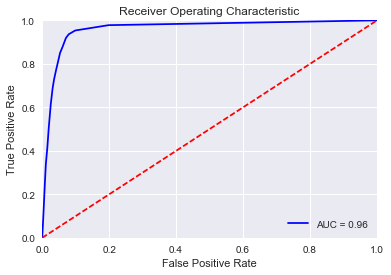

In [119]:
k=17
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
knn_17 = KNeighborsClassifier(n_neighbors=k)
knn_17.fit(X_train,y_train)
y_pred = knn_17.predict(X_test)

# Compute confusion matrix
 
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix using matplotlib
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1])
 
plt.show()
        
accuracy = accuracy_score(y_test, y_pred)

recall =  recall_score(y_test, y_pred,average='weighted')
precision = precision_score(y_test, y_pred,average='weighted')

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plotting_roc(fpr,tpr,roc_auc)    
    
print("Accuracy :", accuracy)
print("Recall :", recall)
print("Precision :", precision)
print("ROC_AUC :", roc_auc)
print("Threshold :", threshold)



#------------------------------------------------------
#Determine generalization accuracy
    
xhold_out = validate[validate.columns[:-1]]
yhold_out = validate[validate.columns[-1:]]
    
gen_acc=knn_17.score(xhold_out,yhold_out)
print("Generalization Accuracy:     %0.2f" %(gen_acc))
    
yhold_out_true = yhold_out
yhold_out_pred = knn_17.predict(xhold_out)
    
conf_gen = confusion_matrix(yhold_out_true, yhold_out_pred)
print(conf_gen)

print ('\n')
print ("Precision:              %0.2f" %(conf_gen[1, 1] / (conf_gen[1, 1] + conf_gen[0, 1])))
print ("Recall:                 %0.2f"% (conf_gen[1, 1] / (conf_gen[1, 1] + conf_gen[1, 0])))
    
cm_ho=confusion_matrix(yhold_out_true, yhold_out_pred, labels=None)
    
plt.figure()

plot_confusion_matrix(cm_ho, classes=[0,1])
    
#plotting roc curve
yhold_out_score=knn_17.predict_proba(xhold_out)[:,1]

fpr, tpr,_ = roc_curve(yhold_out, yhold_out_score)
roc_auc = auc(fpr, tpr)
plotting_roc(fpr,tpr,roc_auc)    

**Comparison of models using cross validation**

[CV]  ................................................................
[CV] ................................. , score=0.956182, total=   0.2s
[CV]  ................................................................


/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=

[CV] ................................. , score=0.955533, total=   0.1s
[CV]  ................................................................
[CV] ................................. , score=0.958891, total=   0.1s
[CV]  ................................................................
[CV] ................................. , score=0.950336, total=   0.1s
[CV]  ................................................................


/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=

[CV] ................................. , score=0.962589, total=   0.1s
[CV]  ................................................................
[CV] ................................. , score=0.954079, total=   0.1s
[CV]  ................................................................
[CV] ................................. , score=0.958205, total=   0.1s
[CV]  ................................................................


/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.6s remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=

[CV] ................................. , score=0.956537, total=   0.1s
[CV]  ................................................................
[CV] ................................. , score=0.947920, total=   0.1s
[CV]  ................................................................
[CV] ................................. , score=0.958079, total=   0.1s
[CV]  ................................................................


/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. , score=0.968763, total=   0.2s
[CV]  ................................................................
[CV] ................................. , score=0.969018, total=   0.2s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha


[CV]  ................................................................
[CV] ................................. , score=0.965959, total=   0.2s
[CV]  ................................................................
[CV] ................................. , score=0.964287, total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. , score=0.972078, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. , score=0.967794, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.4s remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. , score=0.967737, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.7s remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. , score=0.967965, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.0s remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. , score=0.958827, total=   0.2s
[CV]  ................................................................
[CV] ................................. , score=0.967779, total=   0.2s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.2s remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.4s finished


[CV]  ................................................................


/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ................................. , score=0.955461, total=   5.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ................................. , score=0.952943, total=   6.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.7s remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ................................. , score=0.955083, total=   5.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.2s remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ................................. , score=0.949290, total=   5.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   23.5s remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ................................. , score=0.964791, total=   5.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   29.1s remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ................................. , score=0.955918, total=   5.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   34.5s remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ................................. , score=0.950877, total=   5.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   39.9s remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ................................. , score=0.954850, total=   4.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   44.8s remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ................................. , score=0.943803, total=   4.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   49.5s remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ................................. , score=0.955009, total=   5.0s
[CV]  ................................................................
[CV] ................................. , score=0.913873, total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   54.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................. , score=0.902786, total=   0.1s
[CV]  ................................................................
[CV] ................................. , score=0.902649, total=   0.1s
[CV]  ................................................................
[CV] ................................. , score=0.900730, total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


[CV] ................................. , score=0.900498, total=   0.1s
[CV]  ................................................................
[CV] ................................. , score=0.931567, total=   0.1s
[CV]  ................................................................
[CV] ................................. , score=0.886985, total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s


[CV] ................................. , score=0.915872, total=   0.1s
[CV]  ................................................................
[CV] ................................. , score=0.901226, total=   0.1s
[CV]  ................................................................
[CV] ................................. , score=0.906697, total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. , score=0.942913, total= 2.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. , score=0.952316, total= 2.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.5min remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. , score=0.943023, total= 2.1min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  6.6min remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. , score=0.944135, total= 2.1min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  8.7min remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. , score=0.953705, total= 2.1min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 10.8min remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. , score=0.951125, total= 2.1min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 12.9min remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. , score=0.948634, total= 2.1min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 15.0min remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. , score=0.958352, total= 2.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 17.2min remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. , score=0.936861, total= 2.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 19.4min remaining:    0.0s
/Users/Sonal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. , score=0.948913, total= 2.2min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 21.6min finished


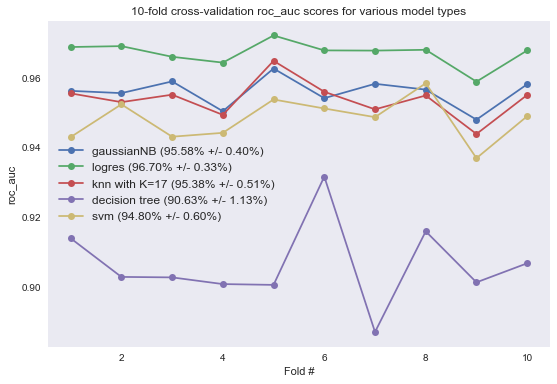

In [132]:

bestKValue = 17
models = {}
models = {'logres': LogisticRegression(), 
          'knn with K=%d' % bestKValue : KNeighborsClassifier(n_neighbors=bestKValue), 
          'gaussianNB': GaussianNB(),
          'decision tree': DecisionTreeClassifier(),
          'svm': svm.SVC(kernel='rbf',probability=True),
          }

scorerType = 'roc_auc'

nrCrossValidationFolds=10
# Shuffling the data 
cvGenerator = KFold(len(X), n_folds=nrCrossValidationFolds, shuffle=True)  

fig = plt.figure(1,(9,6))
plt.title("%d-fold cross-validation %s scores for various model types" % (nrCrossValidationFolds, scorerType))
plt.xlabel("Fold #")
plt.ylabel(scorerType)
plt.grid()

for modelName, model in models.items():
    scores = cross_val_score(model, X, y=y, scoring=scorerType, cv=cvGenerator, n_jobs=1, verbose=10)
    plt.plot(range(1,nrCrossValidationFolds+1), scores, 'o-', label="%s (%2.2f%% +/- %2.2f%%)" % (modelName, scores.mean() * 100, scores.std() * 100))
    
plt.legend(loc='best',fontsize = 'large')
#plt.savefig('model_comp_kfolds.png')
plt.show()

